# Convolutional Neural Network - CIFAR

Let's create a convolutional neural network to handle the CIDAR dataset.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

In [2]:
train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)
test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True)

170499072it [00:15, 11030248.34it/s]                              


Extracting .\cifar-10-python.tar.gz to .
Files already downloaded and verified


In [3]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [4]:
K = len(set(train_dataset.targets))
print("number of classes:", K)

number of classes: 10


In [35]:

batch_size = 128

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [6]:
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=1, 
                                           shuffle=True)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  break

tensor([[[[0.5961, 0.5843, 0.5843,  ..., 0.5529, 0.5490, 0.5451],
          [0.6000, 0.5843, 0.5882,  ..., 0.5529, 0.5490, 0.5451],
          [0.6000, 0.5882, 0.5922,  ..., 0.5569, 0.5490, 0.5451],
          ...,
          [0.5412, 0.5373, 0.5412,  ..., 0.4353, 0.4275, 0.4157],
          [0.5216, 0.5216, 0.5255,  ..., 0.4510, 0.4471, 0.4471],
          [0.5059, 0.5137, 0.5294,  ..., 0.4353, 0.4196, 0.4078]],

         [[0.6706, 0.6627, 0.6706,  ..., 0.6392, 0.6353, 0.6314],
          [0.6706, 0.6667, 0.6745,  ..., 0.6431, 0.6353, 0.6314],
          [0.6784, 0.6784, 0.6824,  ..., 0.6471, 0.6431, 0.6314],
          ...,
          [0.4784, 0.4706, 0.4784,  ..., 0.3843, 0.3765, 0.3647],
          [0.4588, 0.4549, 0.4627,  ..., 0.4157, 0.4118, 0.4039],
          [0.4431, 0.4510, 0.4667,  ..., 0.3882, 0.3725, 0.3608]],

         [[0.8275, 0.8196, 0.8275,  ..., 0.7922, 0.7882, 0.7882],
          [0.8275, 0.8157, 0.8235,  ..., 0.7922, 0.7882, 0.7882],
          [0.8196, 0.8118, 0.8118,  ..., 0

In [36]:
class CNN_Rafael(nn.Module):

  def __init__(self, K):

    super(CNN_Rafael, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2)
    self.fc1 = nn.Linear(128 * 3 * 3, 1024)
    self.fc2 = nn.Linear(1024, K)
  
  def forward(self, x):
    
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = x.view(-1, 128 * 3 * 3)
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    
    return x

In [37]:
model = CNN_Rafael(K)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr= 1e-3, momentum=0.9)

In [20]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    model.train()
    train_loss = []
    for inputs, targets in train_loader:

      optimizer.zero_grad()

      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    train_loss = np.mean(train_loss)
    
    model.eval()
    test_loss = []

    for inputs, targets in test_loader:

      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}')
  
  return train_losses, test_losses

In [38]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=15)

Epoch 1/15, Train Loss: 2.3022,       Test Loss: 2.3011
Epoch 2/15, Train Loss: 2.2998,       Test Loss: 2.2977
Epoch 3/15, Train Loss: 2.2938,       Test Loss: 2.2867
Epoch 4/15, Train Loss: 2.2694,       Test Loss: 2.2331
Epoch 5/15, Train Loss: 2.1349,       Test Loss: 2.0390
Epoch 6/15, Train Loss: 2.0220,       Test Loss: 1.9958
Epoch 7/15, Train Loss: 1.9802,       Test Loss: 1.9559
Epoch 8/15, Train Loss: 1.9408,       Test Loss: 1.9117
Epoch 9/15, Train Loss: 1.8987,       Test Loss: 1.8687
Epoch 10/15, Train Loss: 1.8539,       Test Loss: 1.8353
Epoch 11/15, Train Loss: 1.8168,       Test Loss: 1.7866
Epoch 12/15, Train Loss: 1.7767,       Test Loss: 1.7512
Epoch 13/15, Train Loss: 1.7421,       Test Loss: 1.7156
Epoch 14/15, Train Loss: 1.7079,       Test Loss: 1.6746
Epoch 15/15, Train Loss: 1.6773,       Test Loss: 1.6604


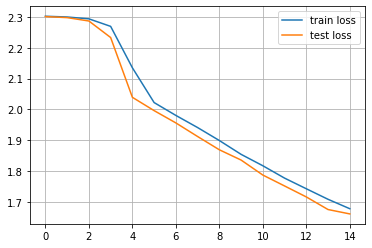

In [45]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.grid()
plt.show()

In [41]:
model.eval()
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
  
  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)
  
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  
  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)
  
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.4033, Test acc: 0.4014


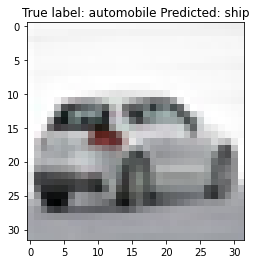

In [43]:
x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])
for inputs, targets in test_loader:

  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)
  
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()


p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3))
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

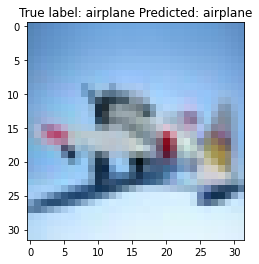

In [44]:
classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i].reshape(32,32,3))
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [48]:
from torchsummary import summary
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 15, 15]             896
            Conv2d-2             [-1, 64, 7, 7]          18,496
            Conv2d-3            [-1, 128, 3, 3]          73,856
            Linear-4                 [-1, 1024]       1,180,672
            Linear-5                   [-1, 10]          10,250
Total params: 1,284,170
Trainable params: 1,284,170
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.10
Params size (MB): 4.90
Estimated Total Size (MB): 5.01
----------------------------------------------------------------


### Improving the Results

    - Let's Create another CNN model;
    - Let's do data augmentation

In [49]:
import torchvision.transforms as transforms

In [50]:
transformer_train = torchvision.transforms.Compose([
 
  transforms.RandomCrop(32, padding=4),
  torchvision.transforms.RandomHorizontalFlip(p=0.5),
  torchvision.transforms.RandomAffine(0, translate=(0.1, 0.1)),
  transforms.ToTensor(),                                            
])

train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transformer_train,
    download=True)
test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True)

Files already downloaded and verified
Files already downloaded and verified


In [51]:
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [53]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [56]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [57]:
train_dataset_fixed = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)
train_loader_fixed = torch.utils.data.DataLoader(
    dataset=train_dataset_fixed, 
    batch_size=batch_size, 
    shuffle=False)

Files already downloaded and verified


In [58]:
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()
    
    # define the conv layers
    self.conv1 = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(2),
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.Conv2d(64, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2),
    )
    self.conv3 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.Conv2d(128, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2),
    )
    
    self.fc1 = nn.Linear(128 * 4 * 4, 1024)
    self.fc2 = nn.Linear(1024, K)
  
  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = x.view(x.size(0), -1)
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    
    return x

In [59]:
model = CNN(K)

summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,248
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          18,496
              ReLU-9           [-1, 64, 16, 16]               0
      BatchNorm2d-10           [-1, 64, 16, 16]             128
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
        MaxPool2d-14             [-1, 6

In [66]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [67]:
batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=15)

Epoch 1/15, Train Loss: 0.9061,       Test Loss: 0.8192
Epoch 2/15, Train Loss: 0.7983,       Test Loss: 0.7654
Epoch 3/15, Train Loss: 0.7236,       Test Loss: 0.6910
Epoch 4/15, Train Loss: 0.6631,       Test Loss: 0.6531
Epoch 5/15, Train Loss: 0.6354,       Test Loss: 0.6146
Epoch 6/15, Train Loss: 0.6019,       Test Loss: 0.5858
Epoch 7/15, Train Loss: 0.5757,       Test Loss: 0.5774
Epoch 8/15, Train Loss: 0.5416,       Test Loss: 0.5836
Epoch 9/15, Train Loss: 0.5222,       Test Loss: 0.5309
Epoch 10/15, Train Loss: 0.5081,       Test Loss: 0.5142
Epoch 11/15, Train Loss: 0.4928,       Test Loss: 0.5332
Epoch 12/15, Train Loss: 0.4727,       Test Loss: 0.5343
Epoch 13/15, Train Loss: 0.4562,       Test Loss: 0.5262
Epoch 14/15, Train Loss: 0.4452,       Test Loss: 0.4984
Epoch 15/15, Train Loss: 0.4357,       Test Loss: 0.4903


(array([0.9060956 , 0.79828599, 0.72359847, 0.66314505, 0.63537782,
        0.60194995, 0.5756705 , 0.54156912, 0.52223326, 0.50813303,
        0.49279646, 0.4727441 , 0.4562457 , 0.44518509, 0.43570063]),
 array([0.81918857, 0.76537053, 0.69098691, 0.65308382, 0.61457373,
        0.58575555, 0.57743094, 0.58363366, 0.53092578, 0.51420187,
        0.53318046, 0.5343155 , 0.52615634, 0.49837191, 0.49027866]))

In [69]:
model.eval()
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader_fixed:
  

  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)
  
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)
  
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.8791, Test acc: 0.8371
